<a href="https://colab.research.google.com/github/JManuelRG/cursopython/blob/main/2%20Uso%20de%20librer%C3%ADas/T%20burbuja%20con%20Gamma_phi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Video Explicación:
https://youtu.be/DCV-FxyycqQ

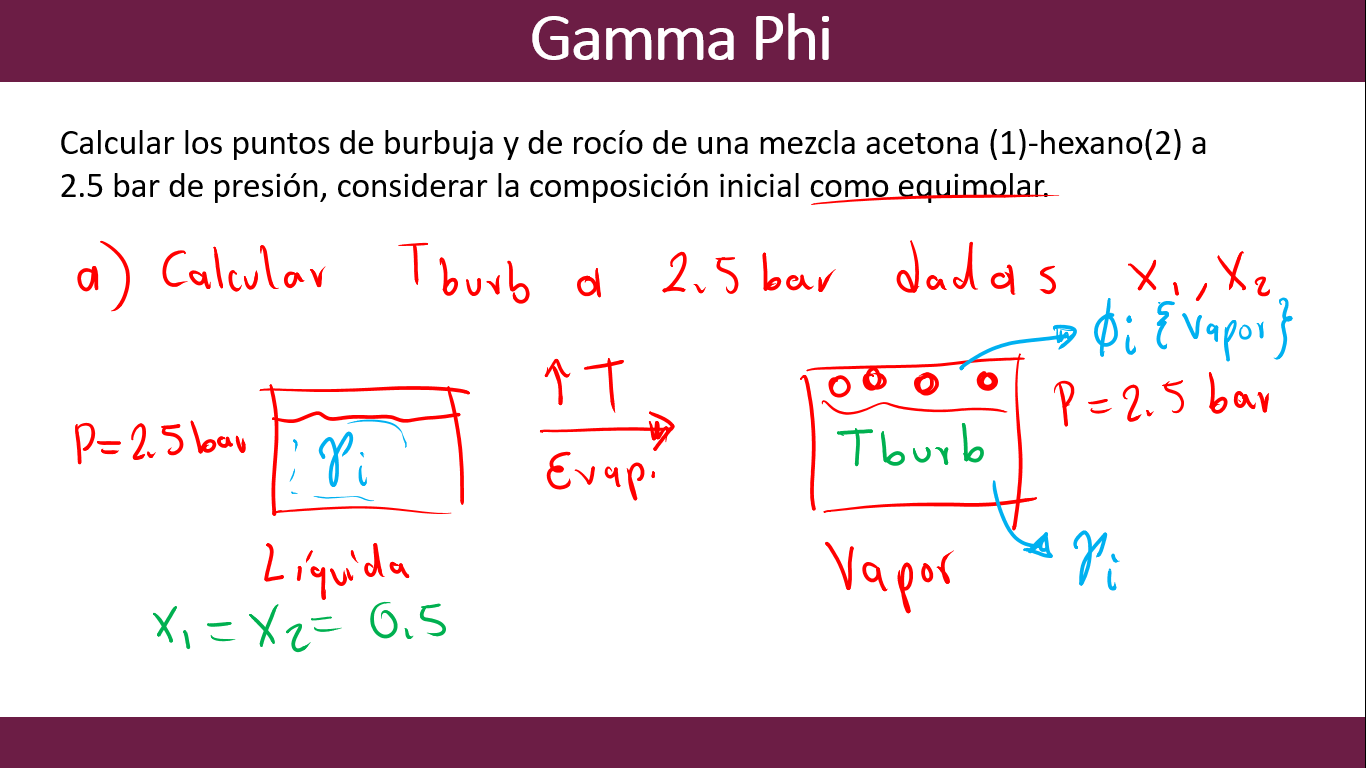

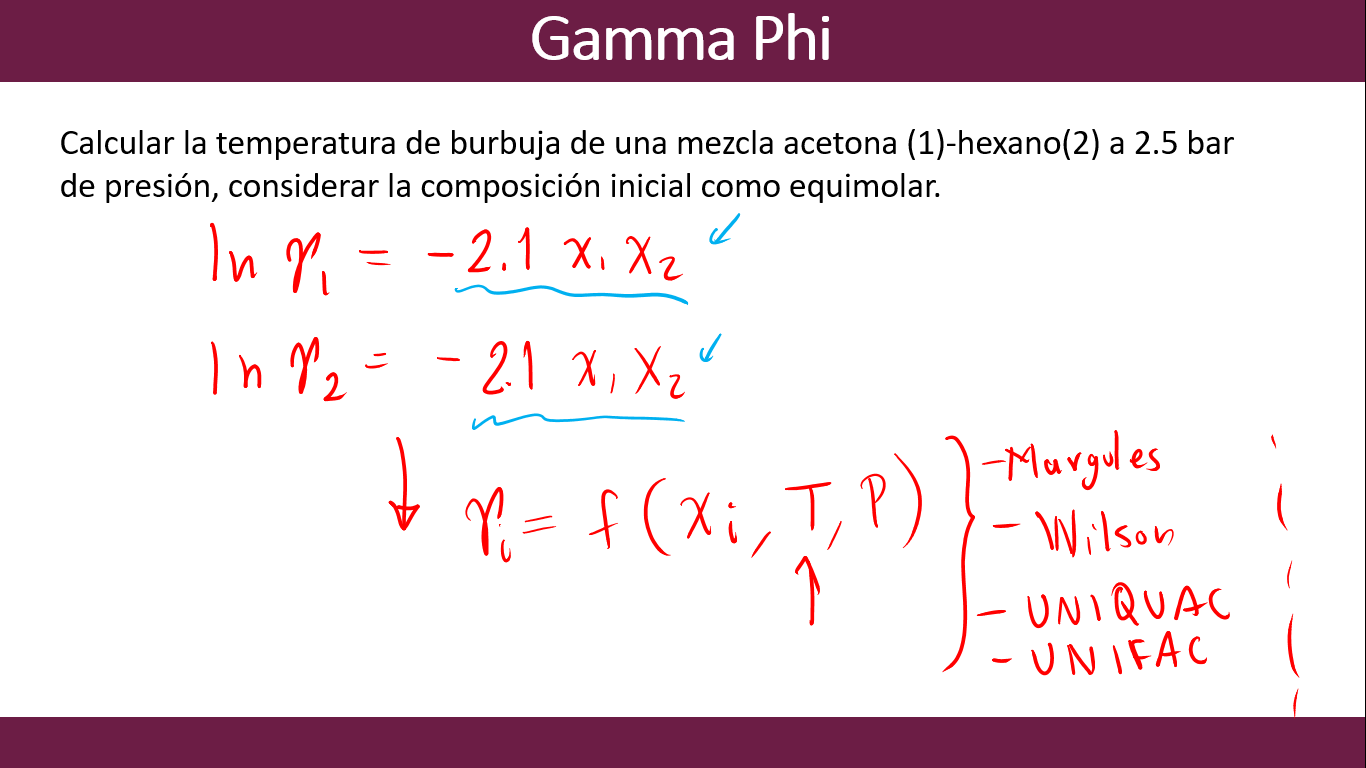

# Constantes de Antoine: Tabla B2 Termodinámica Smith

In [28]:
# Acetona (1)
A1=14.3145
B1=2756.22
C1=228.06

In [29]:
# Hexano (2)
A2=13.8193
B2=2696.04
C2=224.317

# Funciones para calcular Presiones de saturación y temperaturas de saturación (Tabla B2 Smith)
#$$ln P^{sat}(kPa) = A-\frac{B}{T(°C)+C}$$
#$$T^{sat}(°C)=\frac{B}{A-lnP(kPa)}-C$$

In [30]:
import math # Librería de funciones matemáticas exponencial y logaritmo
def Psat(A,B,C,T):
  return math.exp(A-B/(T+C))

def Tsat(A, B, C, P):
  return B/(A-math.log(P))-C

# Presiones de saturación estarán en kPa y Temperatura en Celsius

In [31]:
P=250 #kPa
#acetona
T1=Tsat(A1,B1,C1,P)
T1

85.39476509924827

In [32]:
# Hexano
T2=Tsat(A2,B2,C2,P)
T2

100.5916868656683

In [33]:
#Datos iniciales:
x1=x2=0.5 # Composiciones en la fase líquida

#$$T_{sup}=\sum{x_iT_i^{sat}}$$

In [34]:
Tsup=(x1*T1+x2*T2) # Ponderación de T supuesta
Tsup

92.99322598245828

In [35]:
# P1 a Tsup de acetona
Psat(A1,B1,C1,Tsup)

307.8363631565726

In [36]:
# Función para calcular coeficiente de actividad
def gama(x1,x2):
  return math.exp(-2.1*x1*x2)

In [37]:
# Coeficiente de actividad de acetona y hexano son iguales
gama1=gama2=gama(x1,x2)
gama1

0.5915553643668151

In [38]:
# Psat2 hexano a 93°C
Psat(A2,B2,C2,Tsup)

204.948132530328

In [39]:
# Calcular T para Psat de hexano
Tsat(A2,B2,C2,204.948132530328)

92.99322598245828

# Iteraciones
$$T_{supuesta}=93°C$$
$$P=2.5 bar=250 kPa$$
$$P^{sat}_1=307.8363631565726 kPa$$
$$P^{sat}_2=204.948132530328 kPa$$
$$x_1=x_2=0.5$$



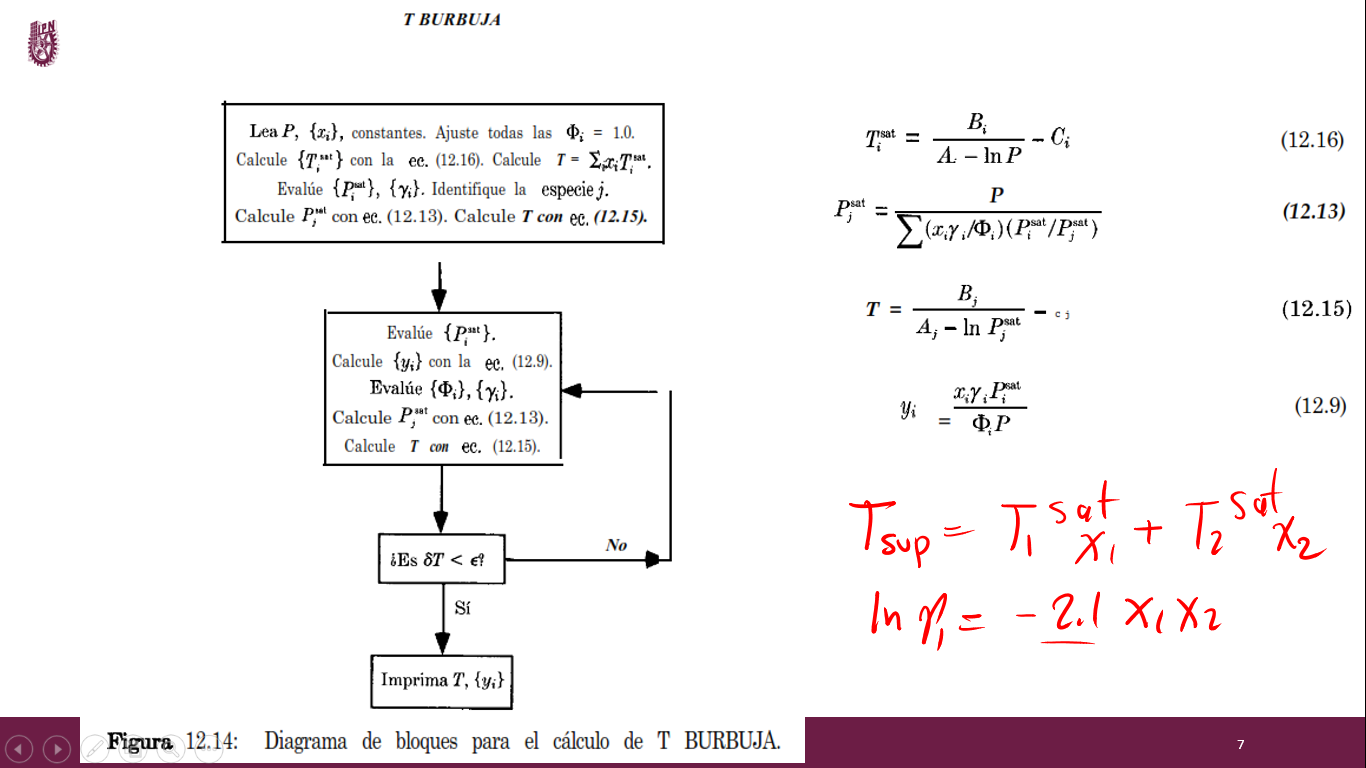

In [40]:
#Acetona 
Psat(A1,B1,C1,93) # Presiones de saturación se deben calcular con T en celsius y el resultado está en kPa

307.8921274507818

In [41]:
# Hexano
Psat(A2,B2,C2,93)

204.98530989427204

In [42]:
# Iteración 1
# Calcular y
phi=1 # Inicializar coef. de fugacidad

y1=x1*gama1*307.8921274507818/(phi*P)
y1 # Composición de acetona en el vapor

0.3642704792796422

In [43]:
1-y1 # Composición en el vapor de hexano

0.6357295207203578

# Cálculo de coeficiente de fugacidad
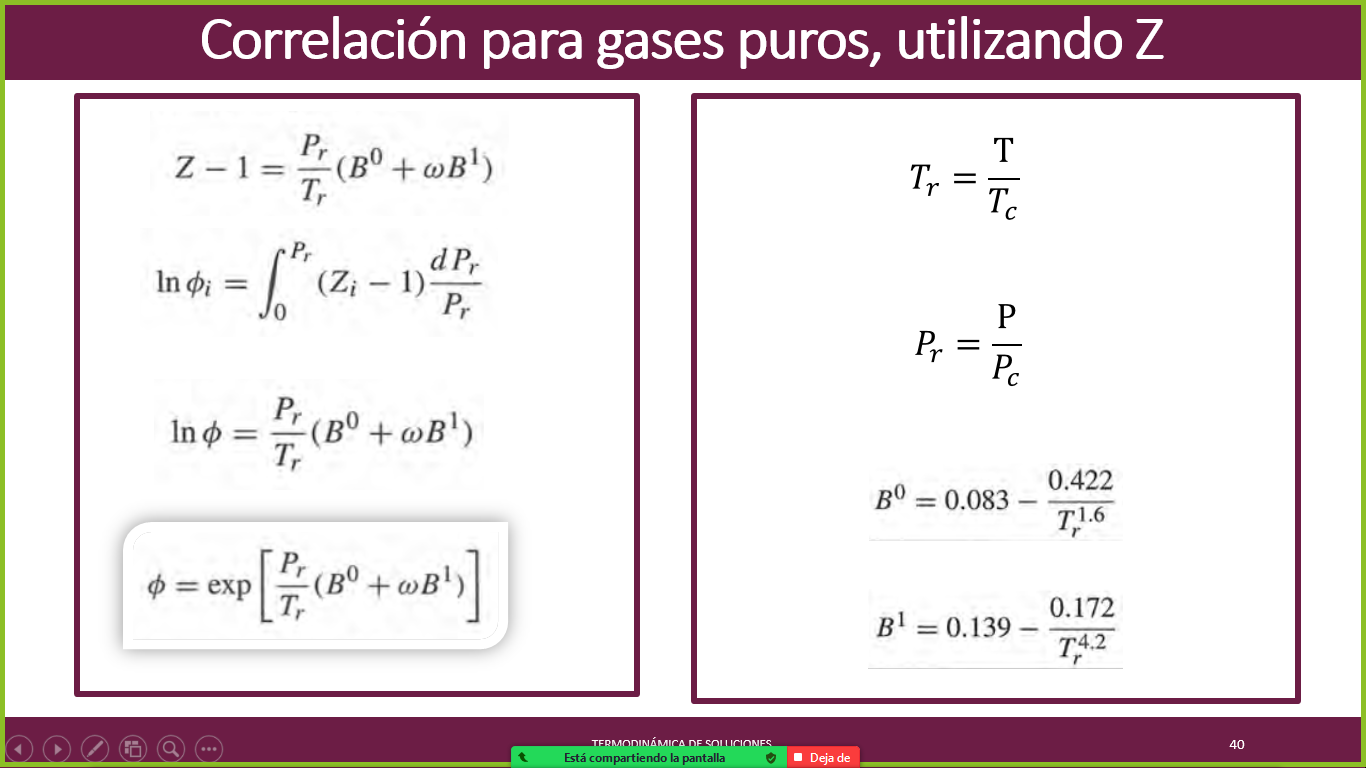

In [44]:
# Calcular phi
# Se supone una solución ideal y se calcula por medio de las correlaciones de Pitzer como si los componentes fueran puros
# Datos Tabla B1. Propiedades de Especies Puras

# 1 Acetona
w1=0.307 # Factor acéntrico
Tc1=508.2 #K Temperatura crítica
Pc1=4701 #kpa Presión crítica

# 2 Hexano
w2=0.301 #Factor acéntrico
Tc2=507.6 #K Temperatura crítica
Pc2=3025 #kpa presión crítica

In [45]:
T=93+273.15 # Coef. de fugacidad se debe calcular con T en Kelvin

In [46]:
# Cálculo de phi por correlaciones de Pitzer
def PHI(Tc, Pc, w):
  global T,P
  Tr=T/Tc # Temperaturass en Kelvin
  Pr=P/Pc # Presiones en kPa
  Bo=0.083-0.422/Tr**1.6
  B1=0.139-0.172/Tr**4.2
  PHI=math.exp((Pr/Tr)*(Bo+w*B1))
  return PHI

In [47]:
# Coef. de fugacidad de acetona
phi1=PHI(Tc1,Pc1,w1)
phi1

0.9428963889970376

In [48]:
# Coef. de fugacidad de hexano
phi2=PHI(Tc2,Pc2,w2)
phi2

0.9133602346322339

In [49]:
# P2sat ec 12.13
P/((x1*gama1/phi1+x2*gama2/phi2)*(307.8363631565726/204.948132530328))

261.0758550297718

In [50]:
T=Tsat(A2,B2,C2,265.0866892508068)
T

102.90237778109486

In [51]:
102.9-93

9.900000000000006

Repetir hasta que T no cambie

# Iteración 2


In [52]:
Psat(A1,B1,C1,T)

398.06081370006876

In [53]:
Psat(A2,B2,C2,T)

265.08668925080667

In [54]:
# Calculo de y1
y1=x1*gama1*398.06081370006876/(phi1*P)
y1

0.49947165443908575

In [55]:
y2=1-y1

In [56]:
T=102.9+273.15

In [57]:
phi1=PHI(Tc1,Pc1,w1)
phi1

0.9478913012950642

In [58]:
phi2=PHI(Tc2,Pc2,w2)
phi2

0.9208045526674346

In [59]:
# P2sat ec 12.13
P/((x1*gama1/phi1+x2*gama2/phi2)*(398.06081370006876/265.08668925080667))

262.9059867183195

In [60]:
T=Tsat(A2,B2,C2,262.9059867183195)
T

102.5746467978613

In [61]:
102.5746467978613-102.9

-0.3253532021387002

# Iteración 3


In [62]:
Psat(A1,B1,C1,T)

394.78844256484757

In [63]:
Psat(A2,B2,C2,T)

262.9059867183196

In [64]:
# Calculo de y1
y1=x1*gama1*394.78844256484757/(phi1*P)
y1

0.49275527831130217

In [65]:
y2=1-y1

In [66]:
y2

0.5072447216886978

In [67]:
T=T+273.15

In [68]:
phi1=PHI(Tc1,Pc1,w1)
phi1

0.9477363768681578

In [69]:
phi2=PHI(Tc2,Pc2,w2)
phi2

0.9205732975146014

In [70]:
# P2 con Ec. 12.13
P/((x1*gama1/phi1+x2*gama2/phi2)*(394.78844256484757/262.9059867183196))

262.8498382002034

In [71]:
Tsat(A2,B2,C2,262.8498382002034)

102.56618126556998

In [72]:
102.56618126556998-102.5746467978613

-0.008465532291324962

In [73]:
102.56618126556998+273.15

375.71618126556996

# Resultados:

# $$T_{burbuja}=102.56618126556998°C$$
# $$T_{burbuja}=375.71618126556996 K$$
# $$ y_{acetona}=0.49275527831130217$$
# $$ y_{hexano}=0.5072447216886978$$